In [50]:
import sys
from pathlib import Path

# Add project root to Python path
ROOT = Path.cwd().parent  # adjusts if notebook is in /notebooks/
sys.path.append(str(ROOT))

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from src.stats import group_descriptives, independent_t

ROOT = Path.cwd().parents[0]  # adjust if needed
data_path = ROOT / "data" / "processed" / "study_results_clean.csv"

df = pd.read_csv(data_path)
df.head()


,participant,group,correct_1,correct_2,correct_3,correct_4,correct_5,correct_6,correct_7,correct_8,...,abs_19,cws_19,p_20,abs_20,cws_20,total_correct,accuracy,mean_conf,total_abs,total_cws
0,Ho Wei Rui,CG,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,0.400000,1.000000,0.000000,0.000000,11.0,0.55,5.30,22.333333,12.466667
1,Samuel,CG,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.500000,0.600000,0.000000,1.000000,0.400000,13.0,0.65,4.05,21.916667,12.800000
2,Timothy,CG,0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.500000,1.000000,1.000000,0.000000,0.000000,9.0,0.45,4.85,19.750000,10.800000
3,Theo,CG,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.500000,1.000000,0.833333,0.305556,0.066667,17.0,0.85,6.35,25.694444,16.533333
4,Ahmad Danish,CG,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.555556,0.133333,0.500000,0.750000,0.200000,8.0,0.40,4.75,19.694444,9.666667


In [52]:
# ---- Significance level / CI settings ----
ALPHA = 0.05          # 0.05 for 95% CI, 0.10 for 90% CI, etc.
CI_LEVEL = 100 * (1 - ALPHA)

print(f"Using alpha = {ALPHA:.2f}, so CI level = {CI_LEVEL:.0f}%")

Using alpha = 0.05, so CI level = 95%


In [53]:
AVAILABLE_SCORES = {
    "accuracy": "accuracy",
    "abs": "total_abs",
    "cws": "total_cws",
}

for label, dv_col in AVAILABLE_SCORES.items():
    print(f"\n=== {label.upper()} ({dv_col}) ===")
    display(group_descriptives(df, dv_col))
    print(independent_t(df, dv_col))


=== ACCURACY (accuracy) ===


,group,n,mean,sd,se
0,CG,21,0.554762,0.147398,0.032165
1,EG,21,0.492857,0.135357,0.029537


{'dv': 'accuracy', 'group1': 'CG', 'group2': 'EG', 'mean1': np.float64(0.5547619047619048), 'mean2': np.float64(0.4928571428571428), 't': np.float64(1.4175727442134127), 'p': np.float64(0.16411428526384836), 'cohens_d': np.float64(0.4374724464941704), 'n1': 21, 'n2': 21}

=== ABS (total_abs) ===


,group,n,mean,sd,se
0,CG,21,21.531746,2.119106,0.462427
1,EG,21,20.882275,2.188563,0.477584


{'dv': 'total_abs', 'group1': 'CG', 'group2': 'EG', 'mean1': np.float64(21.53174603174603), 'mean2': np.float64(20.882275132275133), 't': np.float64(0.9769798880762011), 'p': np.float64(0.33445712468125477), 'cohens_d': np.float64(0.3015025391514949), 'n1': 21, 'n2': 21}

=== CWS (total_cws) ===


,group,n,mean,sd,se
0,CG,21,12.288889,1.876798,0.409551
1,EG,21,11.326984,1.885843,0.411525


{'dv': 'total_cws', 'group1': 'CG', 'group2': 'EG', 'mean1': np.float64(12.288888888888891), 'mean2': np.float64(11.326984126984128), 't': np.float64(1.6567719951747502), 'p': np.float64(0.10539040883048943), 'cohens_d': np.float64(0.5112909379576854), 'n1': 21, 'n2': 21}


In [54]:
for label, dv_col in AVAILABLE_SCORES.items():
    print(f"\n=== {label.upper()} ({dv_col}) ===")
    display(group_descriptives(df, dv_col))
    print(independent_t(df, dv_col))


=== ACCURACY (accuracy) ===


,group,n,mean,sd,se
0,CG,21,0.554762,0.147398,0.032165
1,EG,21,0.492857,0.135357,0.029537


{'dv': 'accuracy', 'group1': 'CG', 'group2': 'EG', 'mean1': np.float64(0.5547619047619048), 'mean2': np.float64(0.4928571428571428), 't': np.float64(1.4175727442134127), 'p': np.float64(0.16411428526384836), 'cohens_d': np.float64(0.4374724464941704), 'n1': 21, 'n2': 21}

=== ABS (total_abs) ===


,group,n,mean,sd,se
0,CG,21,21.531746,2.119106,0.462427
1,EG,21,20.882275,2.188563,0.477584


{'dv': 'total_abs', 'group1': 'CG', 'group2': 'EG', 'mean1': np.float64(21.53174603174603), 'mean2': np.float64(20.882275132275133), 't': np.float64(0.9769798880762011), 'p': np.float64(0.33445712468125477), 'cohens_d': np.float64(0.3015025391514949), 'n1': 21, 'n2': 21}

=== CWS (total_cws) ===


,group,n,mean,sd,se
0,CG,21,12.288889,1.876798,0.409551
1,EG,21,11.326984,1.885843,0.411525


{'dv': 'total_cws', 'group1': 'CG', 'group2': 'EG', 'mean1': np.float64(12.288888888888891), 'mean2': np.float64(11.326984126984128), 't': np.float64(1.6567719951747502), 'p': np.float64(0.10539040883048943), 'cohens_d': np.float64(0.5112909379576854), 'n1': 21, 'n2': 21}


  group   n       mean        sd        se
0    CG  21  12.288889  1.876798  0.409551
1    EG  21  11.326984  1.885843  0.411525
{'dv': 'total_cws', 'group1': 'CG', 'group2': 'EG', 'mean1': np.float64(12.288888888888891), 'mean2': np.float64(11.326984126984128), 't': np.float64(1.6567719951747502), 'p': np.float64(0.10539040883048943), 'cohens_d': np.float64(0.5112909379576854), 'n1': 21, 'n2': 21}


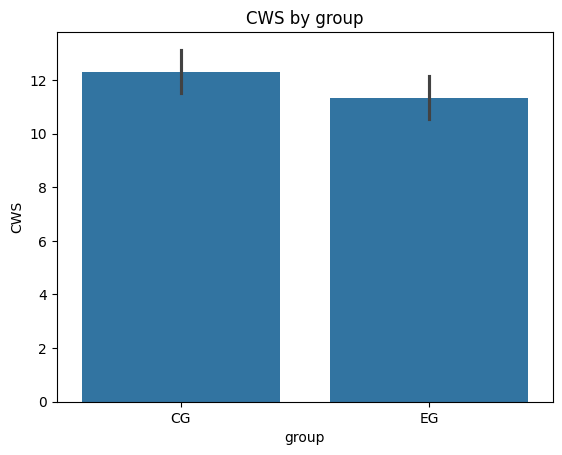

In [55]:
SCORING_METHOD = "cws"   # or "accuracy", "abs", "cws"
DV = AVAILABLE_SCORES[SCORING_METHOD]

print(group_descriptives(df, DV))
print(independent_t(df, DV))

sns.barplot(data=df, x="group", y=DV, errorbar=('ci', CI_LEVEL))
plt.title(f"{SCORING_METHOD.upper()} by group")
plt.ylabel(SCORING_METHOD.upper())
plt.show()

In [56]:
results = []

for label, dv_col in AVAILABLE_SCORES.items():
    res = independent_t(df, dv_col)   # this returns two-tailed p
    res["label"] = label

    # --- convert to one-tailed for H1: CG > EG ---
    p_two = res["p"]
    mean1 = res["mean1"]   # CG mean (group 1)
    mean2 = res["mean2"]   # EG mean (group 2)

    if mean1 > mean2:
        # effect is in hypothesised direction (CG > EG)
        p_one = p_two / 2
        direction = "CG > EG (hypothesised)"
    else:
        # opposite direction
        p_one = 1 - p_two / 2
        direction = "CG ≤ EG (opposite)"

    res["p_one_tailed"] = p_one
    res[f"sig_alpha_{ALPHA}"] = p_one < ALPHA
    res["direction"] = direction

    results.append(res)

results_df = pd.DataFrame(results)[
    ["label", "dv", "mean1", "mean2", "t", "p", "p_one_tailed",
     f"sig_alpha_{ALPHA}", "cohens_d", "n1", "n2", "direction"]
]

results_df

,label,dv,mean1,mean2,t,p,p_one_tailed,sig_alpha_0.05,cohens_d,n1,n2,direction
0,accuracy,accuracy,0.554762,0.492857,1.417573,0.164114,0.082057,False,0.437472,21,21,CG > EG (hypothesised)
1,abs,total_abs,21.531746,20.882275,0.976980,0.334457,0.167229,False,0.301503,21,21,CG > EG (hypothesised)
2,cws,total_cws,12.288889,11.326984,1.656772,0.105390,0.052695,False,0.511291,21,21,CG > EG (hypothesised)


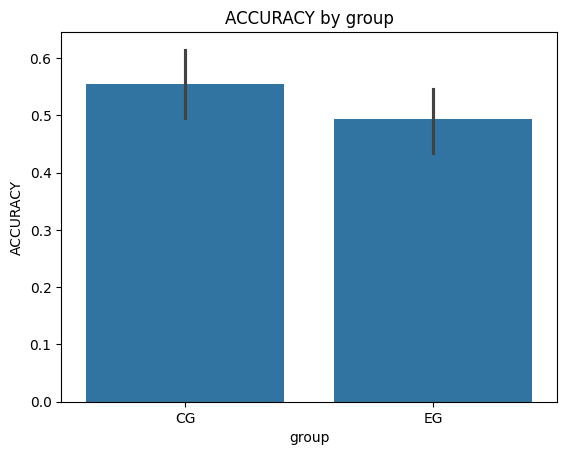

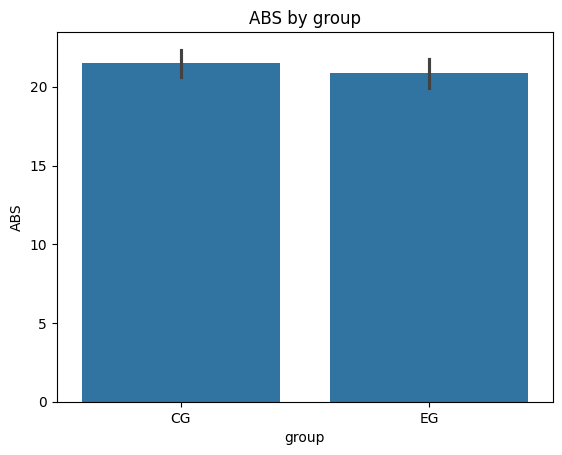

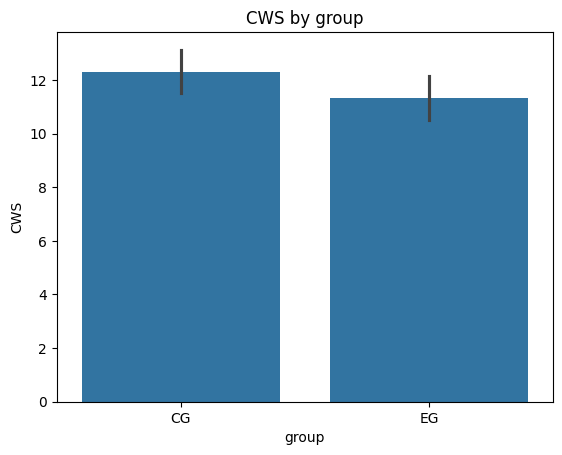

In [57]:
import os

# Create figures directory if it doesn't exist
os.makedirs("./figures", exist_ok=True)

for label, dv_col in AVAILABLE_SCORES.items():
    plt.figure()
    sns.barplot(data=df, x="group", y=dv_col, errorbar=('ci', CI_LEVEL))
    plt.title(f"{label.upper()} by group")
    plt.ylabel(label.upper())
    plt.savefig(f"./figures/{label}_by_group.png", dpi=300, bbox_inches="tight")
    plt.show()